# Applying SMOTE on the imbalanced data

In [101]:
import pandas as pd
day_6 = pd.read_csv('train/02-22-2018_clean.csv')
day_7 = pd.read_csv('train/02-23-2018_clean.csv')

In [48]:
day_6.shape

(836237, 71)

In [49]:
day_7.shape

(836768, 71)

In [50]:
day_6["Label"].unique()

array([0, 2, 5])

In [51]:
print(day_6["Label"].value_counts()[[0]].sum())
print(day_6["Label"].value_counts()[[2]].sum())
print(day_6["Label"].value_counts()[[5]].sum())

835946
265
26


In [52]:
day_7["Label"].unique()

array([0, 2, 5])

In [53]:
print(day_7["Label"].value_counts()[[0]].sum())
print(day_7["Label"].value_counts()[[2]].sum())
print(day_7["Label"].value_counts()[[5]].sum())

836307
421
40


In [103]:
from imblearn.over_sampling import BorderlineSMOTE

# Split the dataset into features and target variable
X = day_6.drop('Label', axis=1)
y = day_6['Label']

# Create a BorderlineSMOTE object
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=12)

# Apply BorderlineSMOTE to the dataset
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_day_6 = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_day_6.columns = day_6.columns

# Print the value counts of the target variable in the resampled data
print(resampled_day_6['Label'].value_counts())


0    835946
2    835946
5    835946
Name: Label, dtype: int64


In [104]:
from imblearn.over_sampling import BorderlineSMOTE

# Split the dataset into features and target variable
X = day_7.drop('Label', axis=1)
y = day_7['Label']

# Create a BorderlineSMOTE object
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=12)

# Apply BorderlineSMOTE to the dataset
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_day_7 = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_day_7.columns = day_6.columns

# Print the value counts of the target variable in the resampled data
print(resampled_day_7['Label'].value_counts())


0    836307
2    836307
5    836307
Name: Label, dtype: int64


In [19]:
day_1 = pd.read_csv("train/02-14-2018_clean.csv")
day_2 = pd.read_csv("train/02-15-2018_clean.csv")
day_3 = pd.read_csv("train/02-16-2018_clean.csv")
day_4 = pd.read_csv("train/02-20-2018_clean.csv")
day_5 = pd.read_csv("train/02-21-2018_clean.csv")
day_8 = pd.read_csv("train/02-28-2018_clean.csv")
day_9 = pd.read_csv("train/03-01-2018_clean.csv")
day_10 = pd.read_csv("train/03-02-2018_clean.csv")

In [105]:
import pandas as pd

# repeat for all 10 files

# randomly sample 10% of rows from each dataframe
sampled_day_1 = day_1.sample(frac=0.1, random_state=42)
sampled_day_2 = day_2.sample(frac=0.1, random_state=42)
sampled_day_3 = day_3.sample(frac=0.1, random_state=42)
sampled_day_4 = day_4.sample(frac=0.1, random_state=42)
sampled_day_5 = day_5.sample(frac=0.1, random_state=42)
sampled_day_6 = day_6.sample(frac=0.1, random_state=42)
sampled_day_7 = day_7.sample(frac=0.1, random_state=42)
sampled_day_8 = day_8.sample(frac=0.1, random_state=42)
sampled_day_9 = day_9.sample(frac=0.1, random_state=42)
sampled_day_10 = day_10.sample(frac=0.1, random_state=42)

# concatenate sampled dataframes into a single dataframe
data = pd.concat([sampled_day_1, sampled_day_2, sampled_day_3, sampled_day_4, sampled_day_5, sampled_day_6, sampled_day_7, sampled_day_8, sampled_day_9, sampled_day_10], ignore_index=True)


In [25]:
import numpy as np
print(data.isna().sum())
print(np.isinf(data).sum())

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Max         0
Idle Min         0
Date             0
Time             0
Label            0
Length: 71, dtype: int64
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Max         0
Idle Min         0
Date             0
Time             0
Label            0
Length: 71, dtype: int64


In [30]:
data = data.fillna(data.mean())

In [28]:
data.dropna(inplace=True)

In [106]:
data = data.astype('int64')

In [107]:
data1 = data.sample(frac=0.1, random_state=42)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# assuming "data" is your dataset and "label" is the column containing the labels
X = data1.drop('Label', axis=1)
y = data1['Label']

# split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an AdaBoostClassifier with decision tree as the base estimator
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier())

# train the classifier on the "train" dataset
clf.fit(X_train, y_train)

# predict the labels of the "test" dataset using the trained classifier
y_pred = clf.predict(X_test)

# evaluate the performance of the classifier on the "test" dataset using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9920490506329114


In [109]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Precision: [0.99241554 1.         1.         1.         0.72093023]
Recall: [0.99833534 1.         0.99553571 1.         0.3618677 ]
F1-score: [0.99536664 1.         0.99776286 1.         0.48186528]
Confusion Matrix:
[[21590     0     0     0    36]
 [    0   448     0     0     0]
 [    1     0   223     0     0]
 [    0     0     0  2725     0]
 [  164     0     0     0    93]]


In [110]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.9920490506329114
Precision: 0.9906747415165558
Recall: 0.9920490506329114
F1-score: 0.9907490946084693


In [111]:
print(cm)

[[21590     0     0     0    36]
 [    0   448     0     0     0]
 [    1     0   223     0     0]
 [    0     0     0  2725     0]
 [  164     0     0     0    93]]


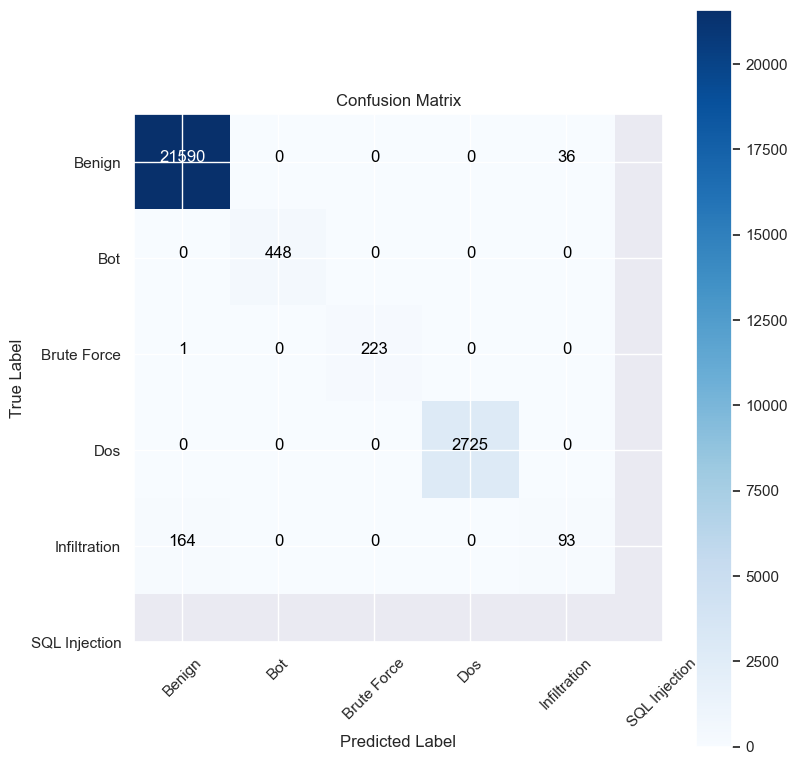

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming "y_test" and "y_pred" are the ground truth labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# define class labels
class_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# plot the text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [113]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the 'test.csv' dataset into a pandas dataframe
test_data = pd.read_csv('test/test.csv')
test_data = test_data.astype('int64')
# Preprocess the data (e.g., remove missing values, encode categorical variables, etc.)
# ...

# Split the preprocessed 'test' data into X_test and y_test
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

# Use the trained model to predict the labels of X_test
y_pred = clf.predict(X_test)

# Compare the predicted labels with the true labels (y_test) and compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy on test data:', accuracy)


Accuracy on test data: 0.9921403944043506


In [114]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.9921403944043506
Precision: 0.9908693561853926
Recall: 0.9921403944043506
F1-score: 0.9909418804119551


In [78]:
df = day_6.sample(frac=0.01, random_state=42)

In [82]:
from imblearn.combine import SMOTETomek

# Split the dataset into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Create a SMOTETomek object
smote_tomek = SMOTETomek(random_state=42, sampling_strategy='minority', k_neighbors_ratio=0.5)

# Apply SMOTE-Tomek to the dataset
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_df.columns = df.columns

# Print the value counts of the target variable in the resampled data
print(resampled_df['Label'].value_counts())



TypeError: __init__() got an unexpected keyword argument 'k_neighbors_ratio'

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# assuming "data" is your dataset and "label" is the column containing the labels
X = data1.drop('Label', axis=1)
y = data1['Label']

# split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an AdaBoostClassifier with decision tree as the base estimator
newModel = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier())

# train the classifier on the "train" dataset
newModel.fit(X_train, y_train)

# predict the labels of the "test" dataset using the trained classifier
y_pred = newModel.predict(X_test)

# evaluate the performance of the classifier on the "test" dataset using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9913502109704642


In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))



              precision    recall  f1-score   support

           0     0.9925    0.9983    0.9954   2688282
           1     0.9999    0.9992    0.9995     56613
           2     0.9999    0.9963    0.9981     31550
           3     1.0000    0.9998    0.9999    350965
           4     0.7324    0.3853    0.5050     32524
           5     0.5000    0.0476    0.0870        21

    accuracy                         0.9921   3159955
   macro avg     0.8708    0.7378    0.7641   3159955
weighted avg     0.9909    0.9921    0.9909   3159955

